In [70]:
import pandas as pd
import os

In [71]:
os.getcwd()

'/Users/aisuluomar'

In [3]:
movies = pd.read_csv('/Users/aisuluomar/AnacondaProjects/Movie-Ratings.csv')


In [4]:
len(movies)

559

In [5]:
movies.head()

,Film,Genre,Rotten Tomatoes Ratings %,Audience Ratings %,Budget (million $),Year of release
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [6]:
movies.columns

Index(['Film', 'Genre', 'Rotten Tomatoes Ratings %', 'Audience Ratings %',
       'Budget (million $)', 'Year of release'],
      dtype='object')

In [7]:
movies.columns = ['Film','Genre', 'CriticRating','AudienceRating', \
                 'BudgetMillion','Year']

In [8]:
movies.head()

,Film,Genre,CriticRating,AudienceRating,BudgetMillion,Year
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [9]:
movies.describe()

,CriticRating,AudienceRating,BudgetMillion,Year
count,559.000000,559.000000,559.000000,559.000000
mean,47.309481,58.744186,50.236136,2009.152057
std,26.413091,16.826887,48.731817,1.362632
min,0.000000,0.000000,0.000000,2007.000000
25%,25.000000,47.000000,20.000000,2008.000000
50%,46.000000,58.000000,35.000000,2009.000000
75%,70.000000,72.000000,65.000000,2010.000000
max,97.000000,96.000000,300.000000,2011.000000


In [10]:
movies.Film = movies.Film.astype('category')

In [11]:
movies.Genre = movies.Genre.astype('category')
movies.Year = movies.Year.astype('category')

In [12]:
movies.Genre.cat.categories

Index(['Action', 'Adventure', 'Comedy', 'Drama', 'Horror', 'Romance',
       'Thriller'],
      dtype='object')

In [104]:
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline 
import warnings 
warnings.filterwarnings('ignore')

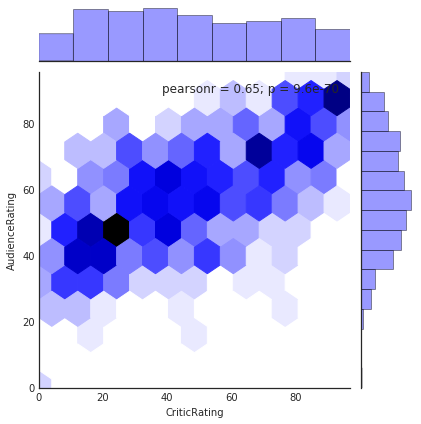

In [73]:
j = sns.jointplot(data=movies, x = 'CriticRating',y = 'AudienceRating', kind = 'hex')

In [74]:
#Histogram

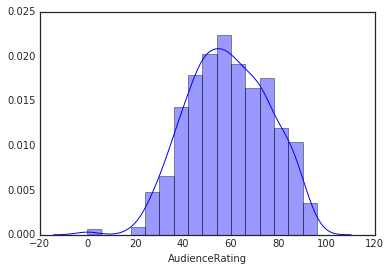

In [75]:
m1 = sns.distplot(movies.AudienceRating)

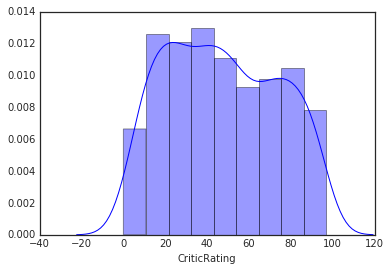

In [76]:
m2 = sns.distplot(movies.CriticRating)

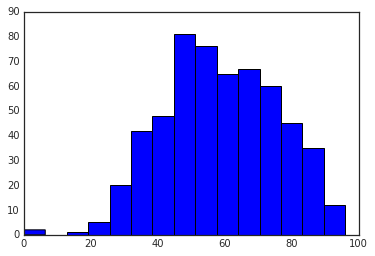

In [77]:
sns.set_style('white')
n1 = plt.hist(movies.AudienceRating, bins = 15)

In [78]:
#Stacked histograms

In [79]:
movies[movies['Genre']=='Drama'].BudgetMillion

10      30
11      20
13       7
18       8
23      20
26       8
27      30
47      13
53      26
55       2
56      55
62      55
74      15
84      25
96      37
99      25
112     60
116     21
117      5
119     31
120     40
128      1
131     24
132     21
151     33
158     16
171      7
195     15
199     35
213     10
      ... 
437     13
442     20
444      2
445     20
446     40
450     65
457     40
466     45
467     11
470     60
480     39
482     32
483     68
484     50
487      0
488      4
489    150
490     16
492     25
508     20
509     10
511      2
516     25
523     26
527     70
529     66
532     38
534     21
541     15
545      2
Name: BudgetMillion, Length: 101, dtype: int64

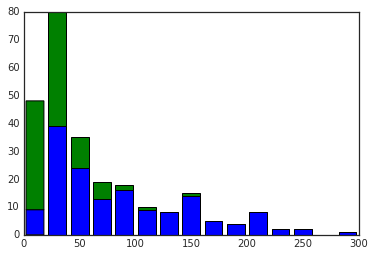

In [80]:
plt.hist([movies[movies.Genre =='Action'].BudgetMillion,\
          movies[movies.Genre =='Drama'].BudgetMillion],\
         bins= 15, stacked=True)
plt.show()

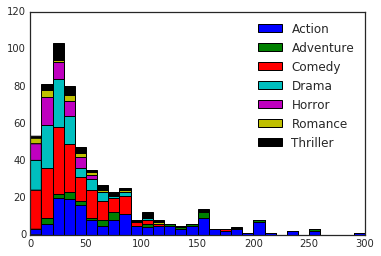

In [81]:
list1 = list()
mylabels = list()
for gen in movies.Genre.cat.categories:
    list1.append(movies[movies.Genre == gen].BudgetMillion)
    mylabels.append(gen)
    
h = plt.hist(list1, bins=30, stacked = True, rwidth=1, label = mylabels)
plt.legend()
plt.show()

In [82]:
#KDE Plot 

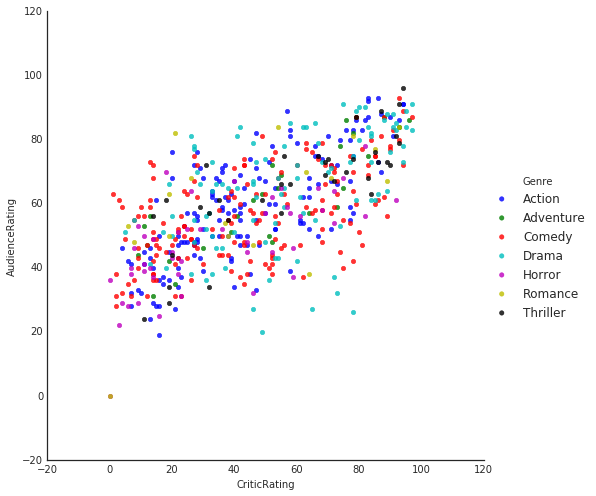

In [83]:
vis1= sns.lmplot(data=movies, x='CriticRating',y = 'AudienceRating', \
                fit_reg = False, hue = 'Genre', \
                size = 7, aspect= 1)

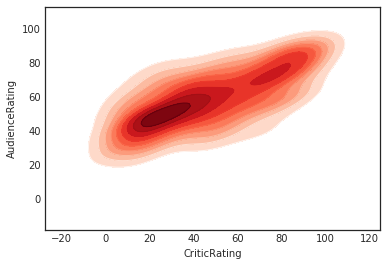

In [84]:
k1 = sns.kdeplot(movies.CriticRating, movies.AudienceRating,\
                shade=True, shade_lowest = False, cmap = 'Reds')
#TIP:
k1b = sns.kdeplot(movies.CriticRating, movies.AudienceRating,\
                cmap = 'Reds')

In [85]:
#Working with subplots

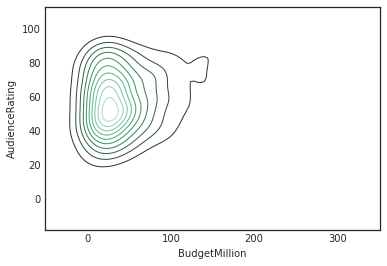

In [87]:
k1 = sns.kdeplot(movies.BudgetMillion, movies.AudienceRating)

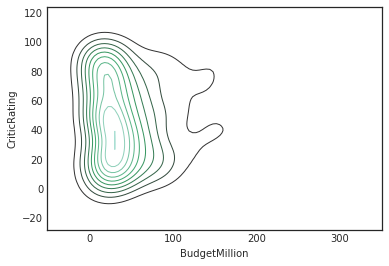

In [88]:
k2 = sns.kdeplot(movies.BudgetMillion, movies.CriticRating)

[(-20, 160)]

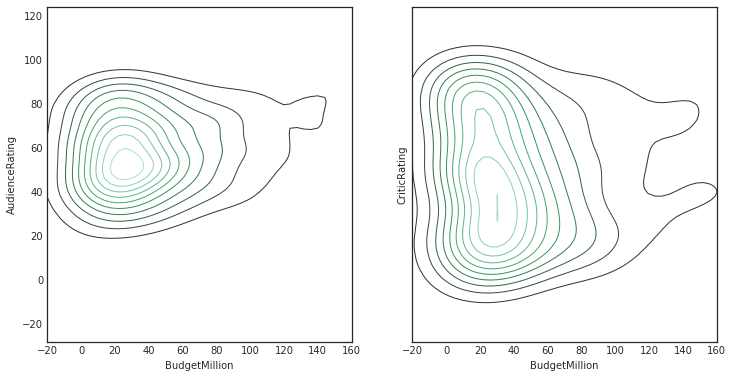

In [100]:
f, axes = plt.subplots(1,2, figsize=(12,6),sharex=True,sharey=True)
k1 = sns.kdeplot(movies.BudgetMillion, movies.AudienceRating, ax= axes[0])
k2 = sns.kdeplot(movies.BudgetMillion, movies.CriticRating, ax=axes[1])
k1.set(xlim=(-20,160))

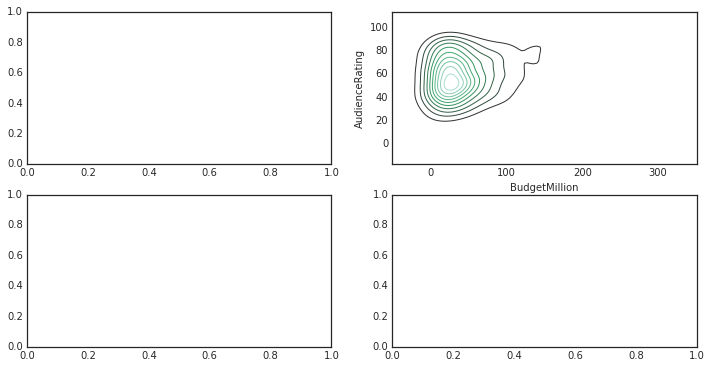

In [96]:
f, axes = plt.subplots(2,2, figsize=(12,6))
k1 = sns.kdeplot(movies.BudgetMillion, movies.AudienceRating, ax= axes[0,1])

In [101]:
#ViolinPLots

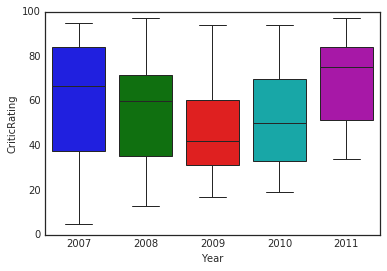

In [108]:
#w = sns.boxplot(data=movies, x='Genre',y = 'CriticRating')
w = sns.boxplot(data=movies[movies.Genre=='Drama'], x='Year',y = 'CriticRating')

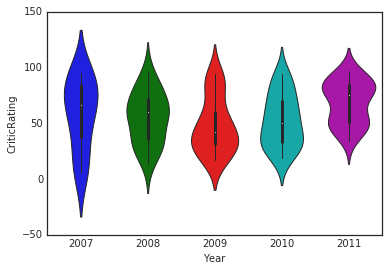

In [109]:
z = sns.violinplot(data=movies[movies.Genre=='Drama'], x='Year', y = 'CriticRating')

In [110]:
#Creating a facet Grid

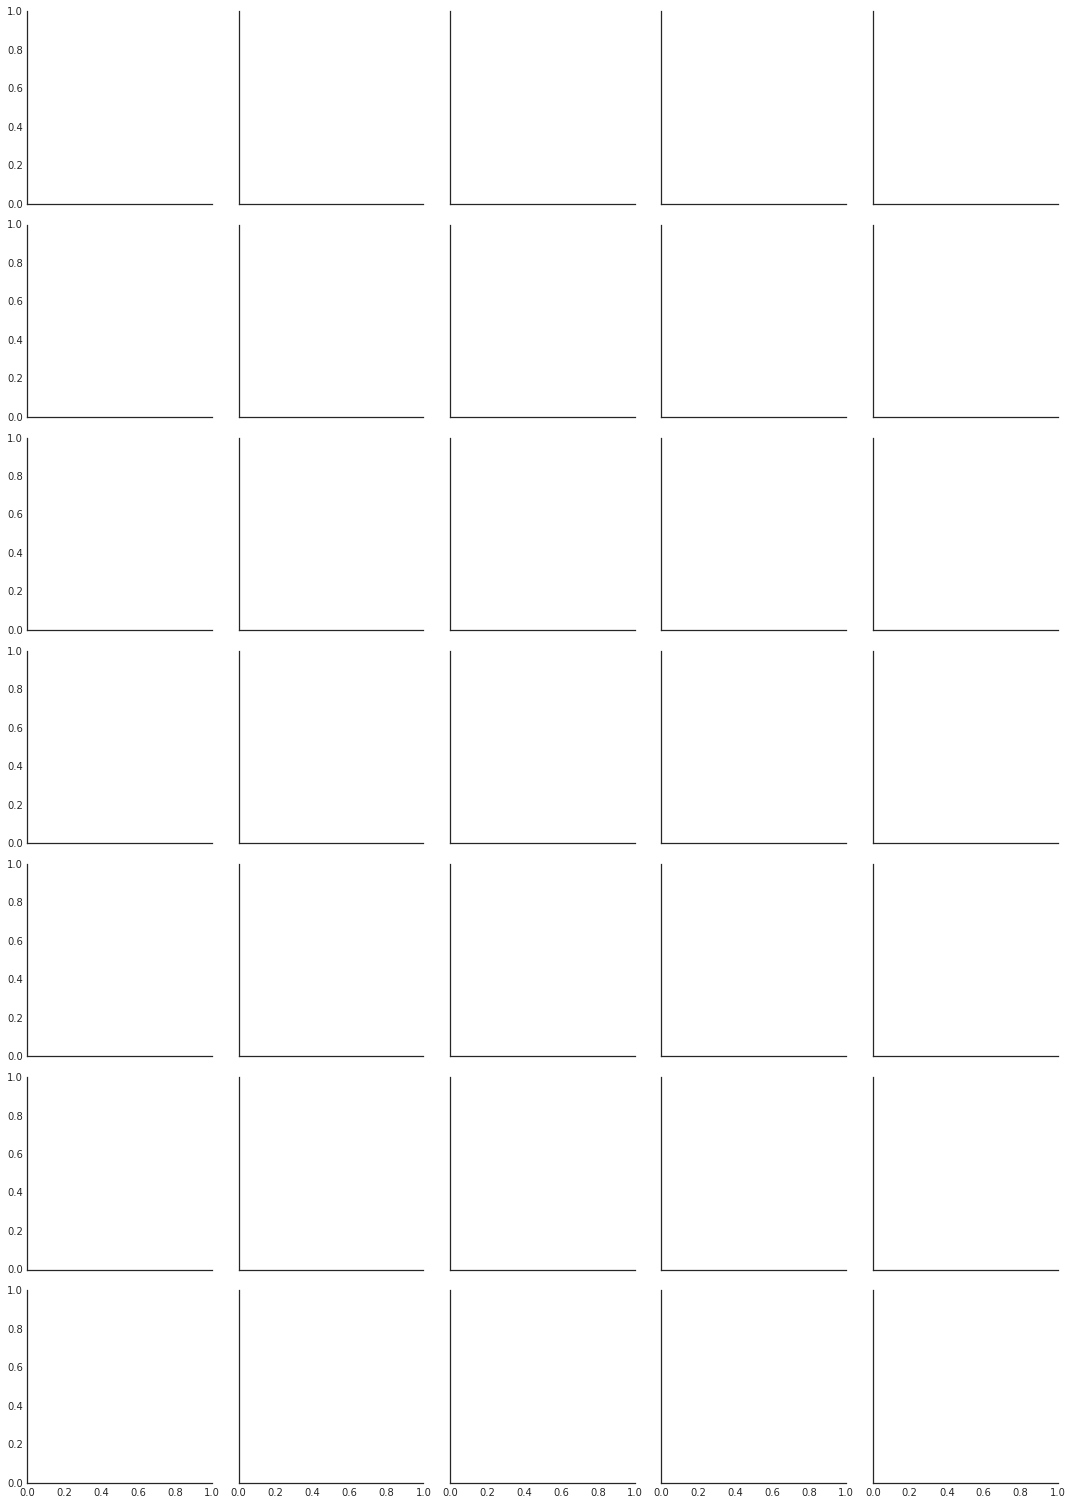

In [112]:
g = sns.FacetGrid(movies, row='Genre', col='Year', hue='Genre')

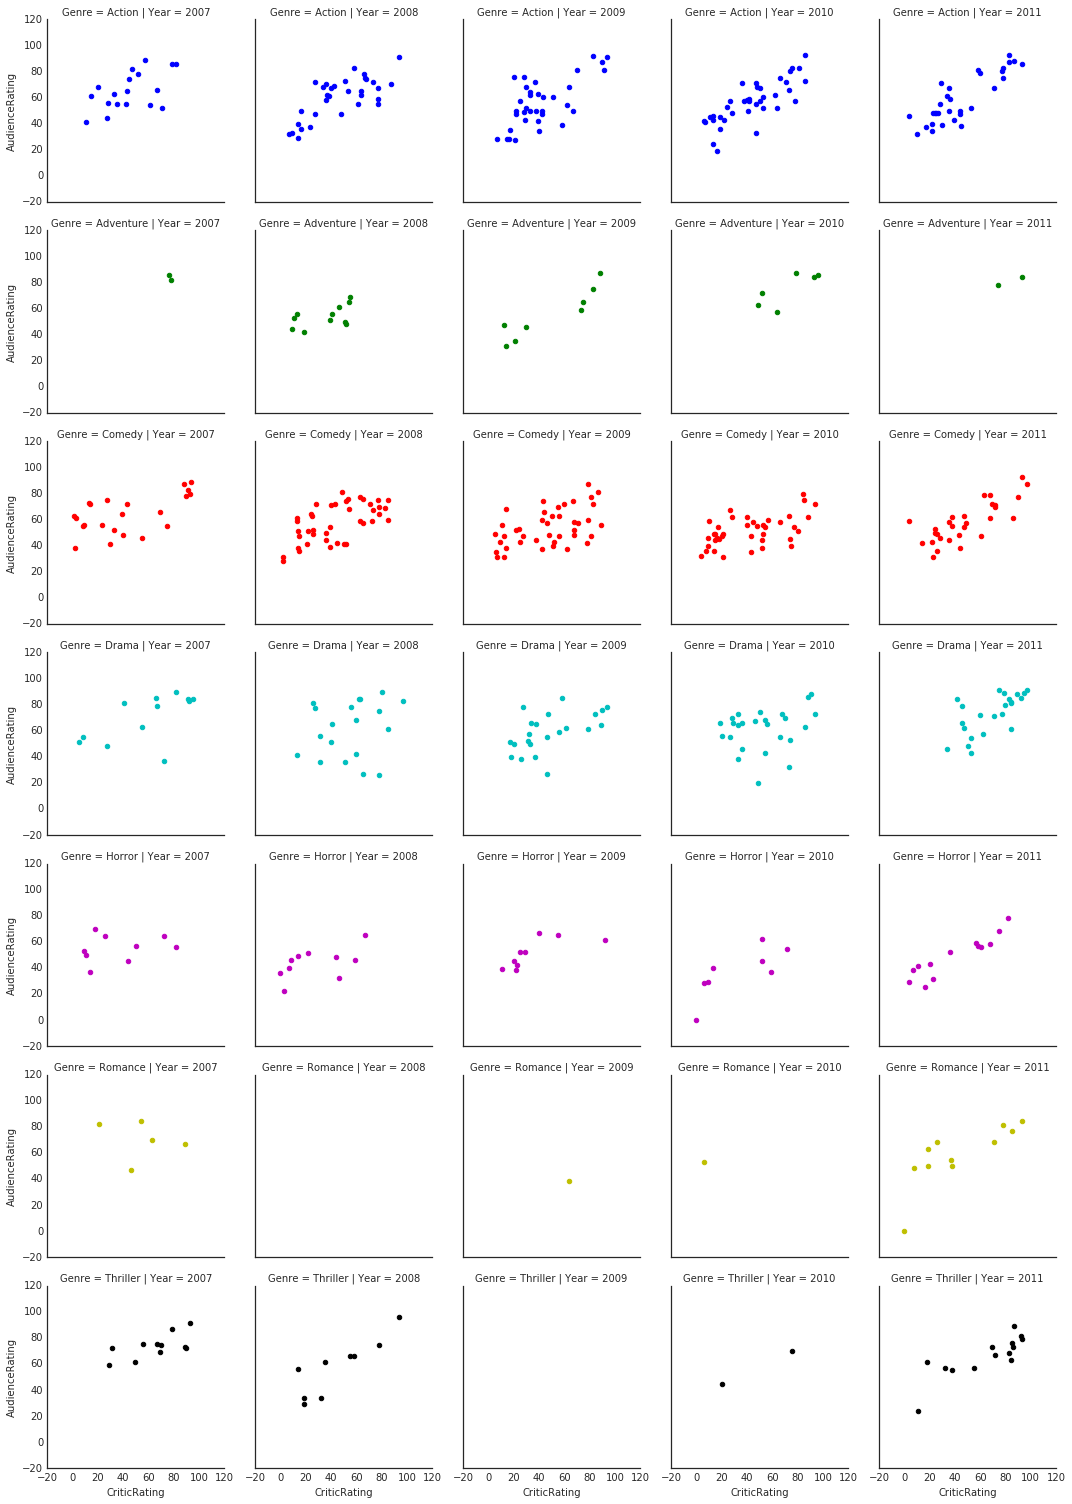

In [114]:
g = sns.FacetGrid(movies, row='Genre', col='Year', hue='Genre')
g = g.map(plt.scatter, 'CriticRating', 'AudienceRating' )

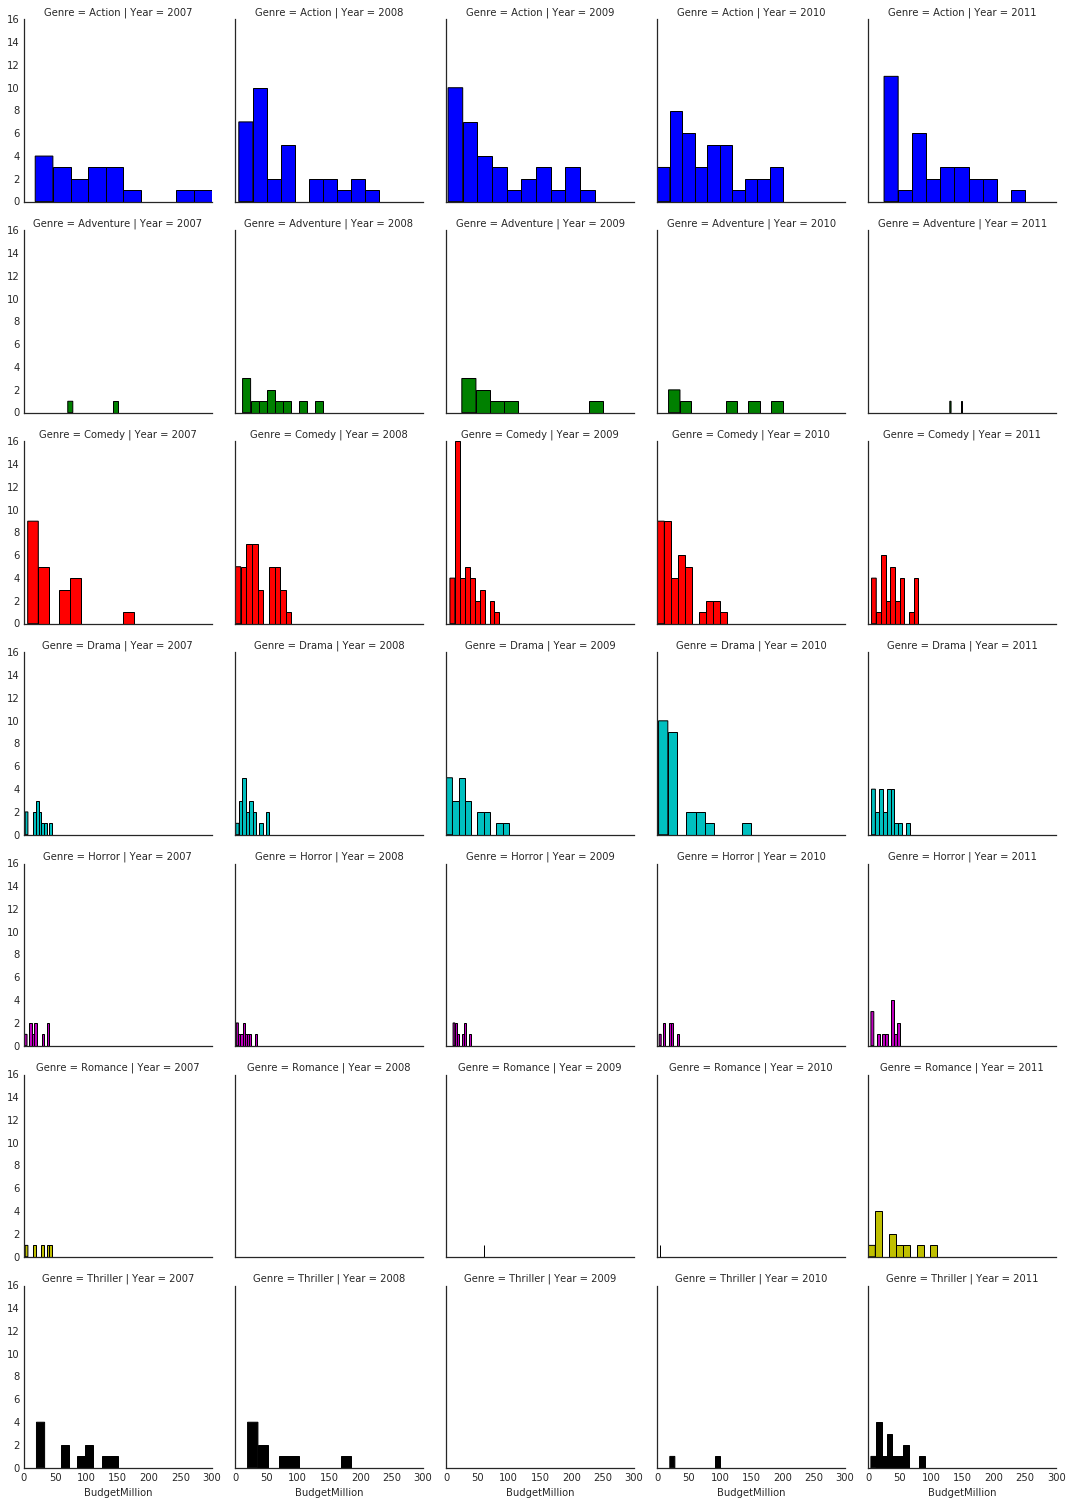

In [115]:
#can populate with any type of chart
g = sns.FacetGrid(movies, row='Genre', col='Year', hue='Genre')
g = g.map(plt.hist, 'BudgetMillion' )

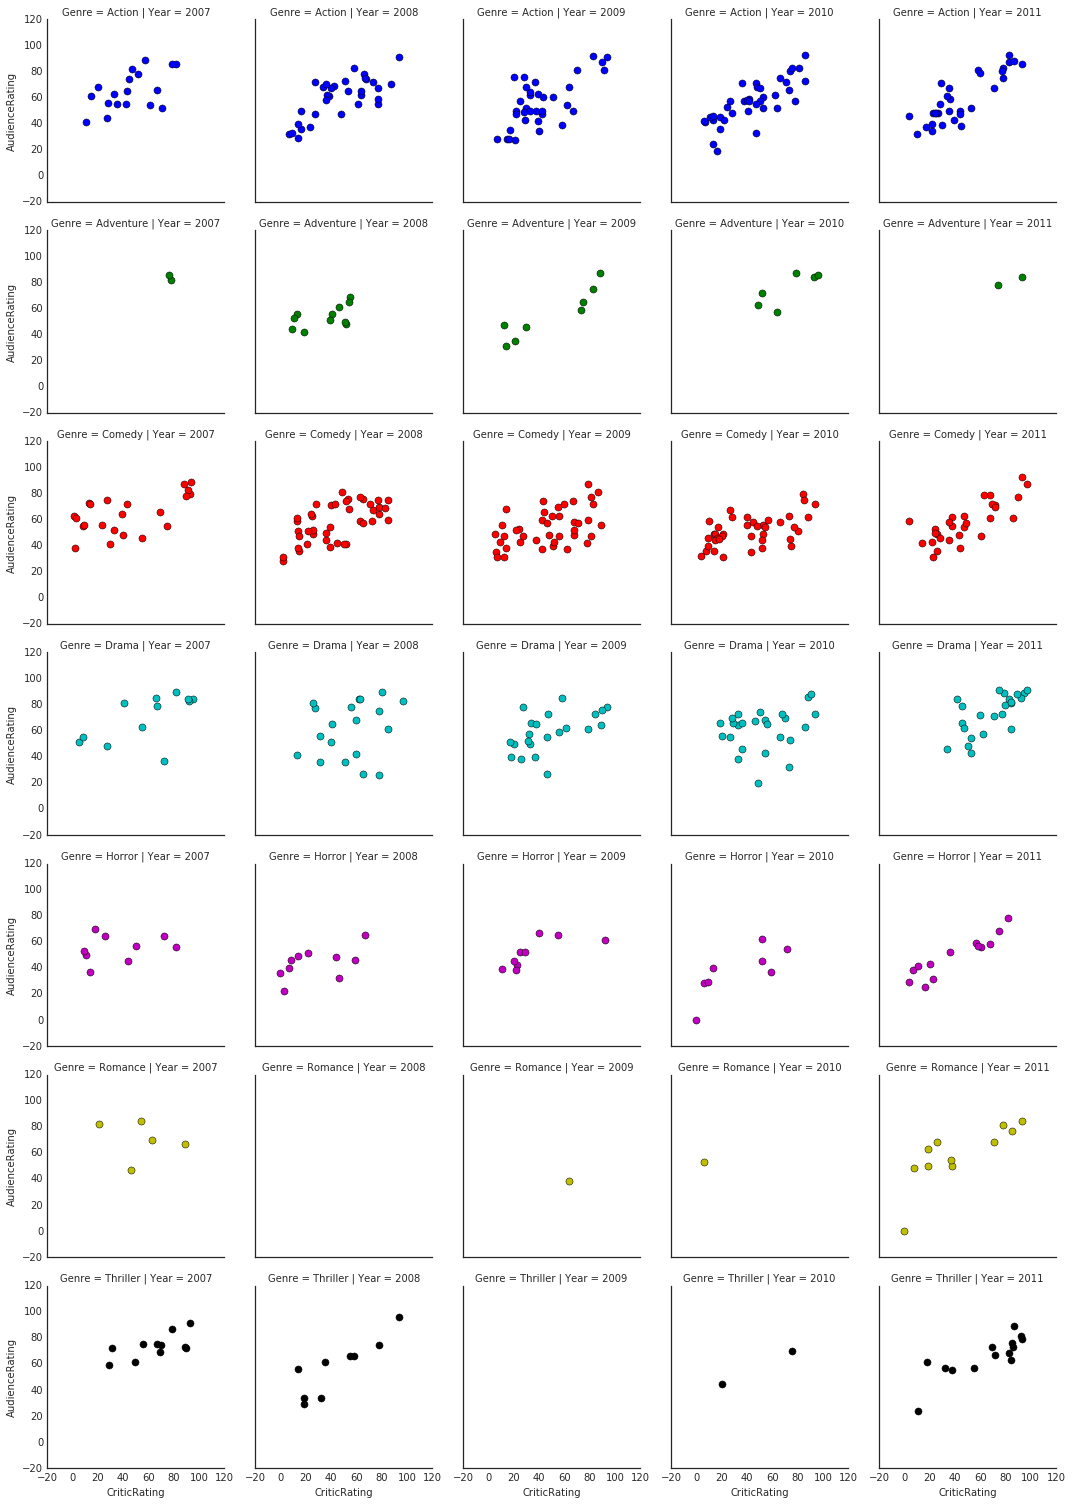

In [120]:
g = sns.FacetGrid(movies, row='Genre', col='Year', hue='Genre')
kws = dict(s=50, linewidth=0.5, edgecolor='black')
g = g.map(plt.scatter, 'CriticRating', 'AudienceRating',**kws )

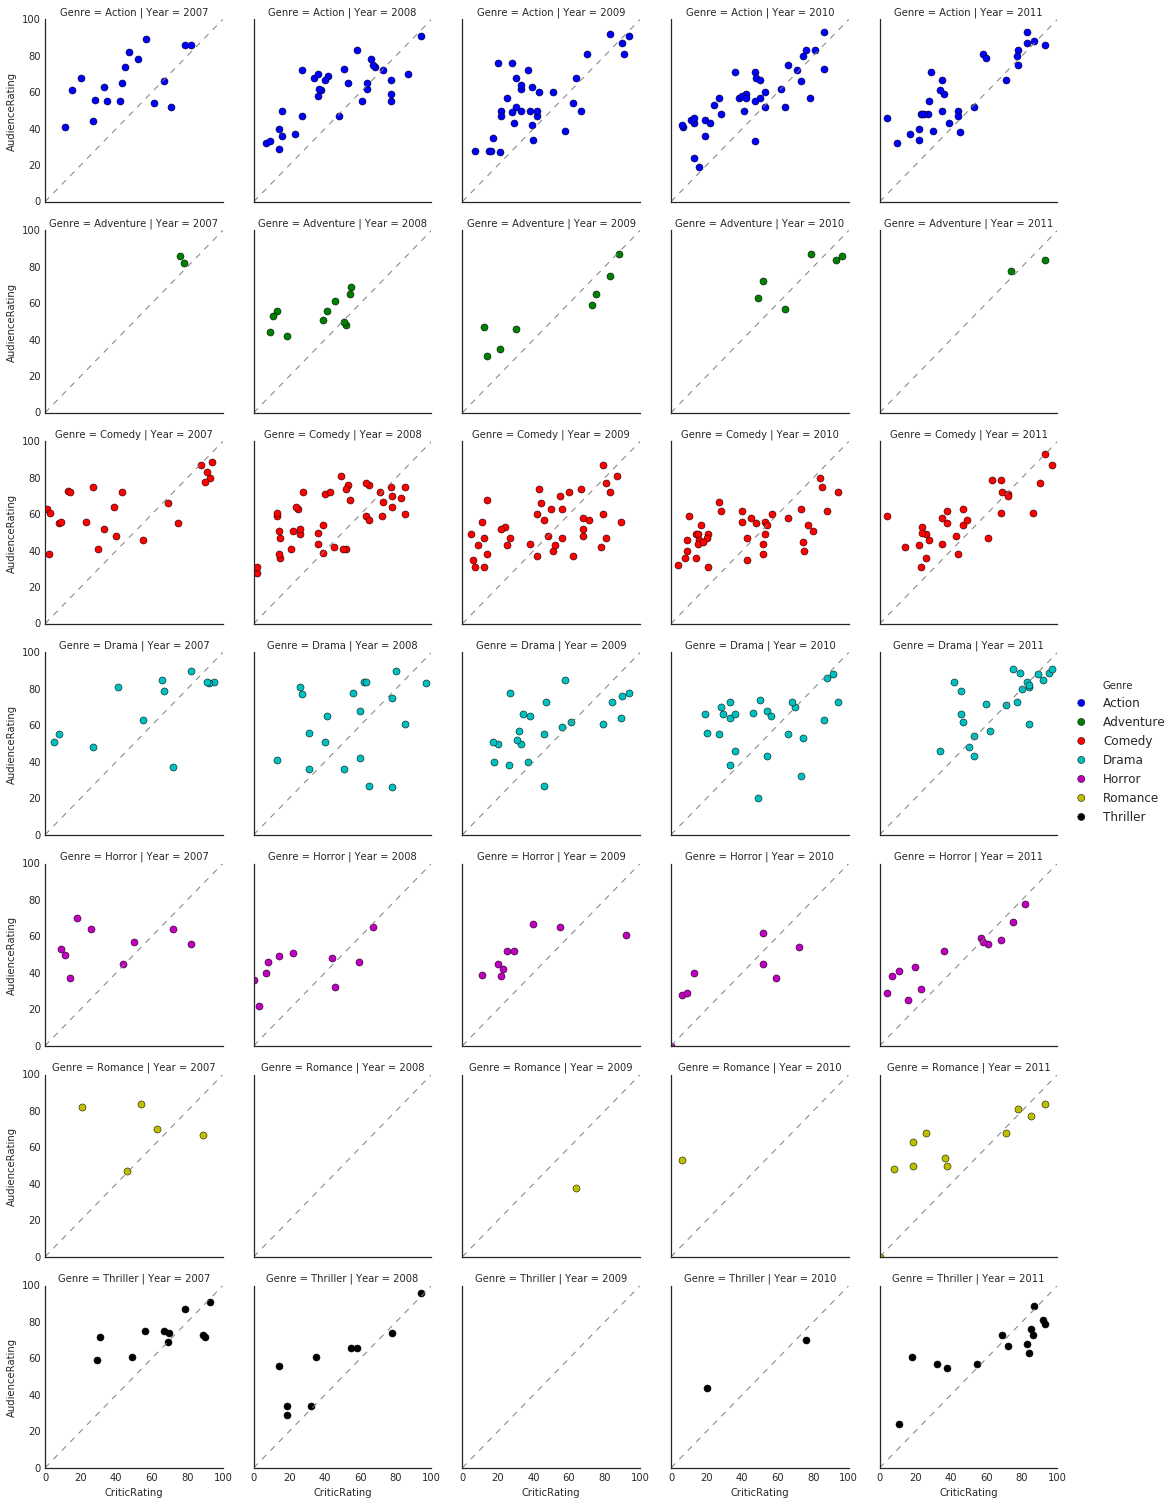

In [124]:
#Controlling axes and adding diagonals
g = sns.FacetGrid(movies, row='Genre', col='Year', hue='Genre')
kws = dict(s=50, linewidth=0.5, edgecolor='black')
g = g.map(plt.scatter, 'CriticRating', 'AudienceRating',**kws )
g.set(xlim=(0,100),ylim=(0,100))
for ax in g.axes.flat:
    ax.plot((0,100),(0,100),c='gray',ls='--')
g.add_legend()

In [125]:
#Building Dashboards

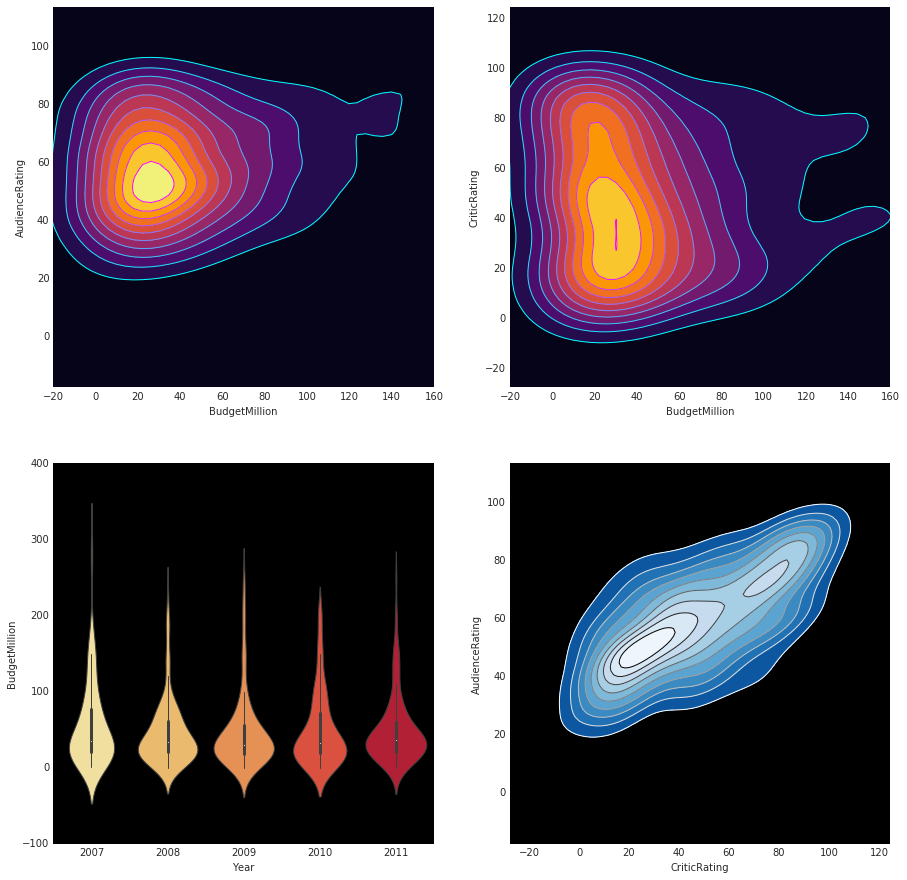

In [154]:
sns.set_style('dark', {'axes.facecolor':'black'})
f, axes = plt.subplots(2,2, figsize=(15,15))
#Plot[0,0]
k1 = sns.kdeplot(movies.BudgetMillion, movies.AudienceRating,\
                 shade=True, shade_lowest=True, cmap='inferno',\
                 ax= axes[0,0])
k1b = sns.kdeplot(movies.BudgetMillion, movies.AudienceRating,\
                 cmap='cool',ax= axes[0,0])
#Plot[0,1]
k2 = sns.kdeplot(movies.BudgetMillion, movies.CriticRating,\
                 shade=True, shade_lowest=True, cmap='inferno',\
                 ax=axes[0,1])
k2b = sns.kdeplot(movies.BudgetMillion, movies.CriticRating,\
                  cmap='cool', ax=axes[0,1])
#Plot[1,0]
z = sns.violinplot(data=movies, x='Year', y = 'BudgetMillion',ax = axes[1,0],\
                  palette = 'YlOrRd')
#Plot[1,1]
k4 = sns.kdeplot(movies.CriticRating, movies.AudienceRating,\
                shade=True, shade_lowest = False, cmap = 'Blues_r',\
               ax=axes[1,1])
#axes[1,1].hist(movies.CriticRating,bins=15)
#TIP:
k4b = sns.kdeplot(movies.CriticRating, movies.AudienceRating,\
                cmap = 'gist_gray_r',ax=axes[1,1])

    
k1.set(xlim=(-20,160))
k2.set(xlim=(-20,160))
plt.show()

In [155]:
#Thematic edits

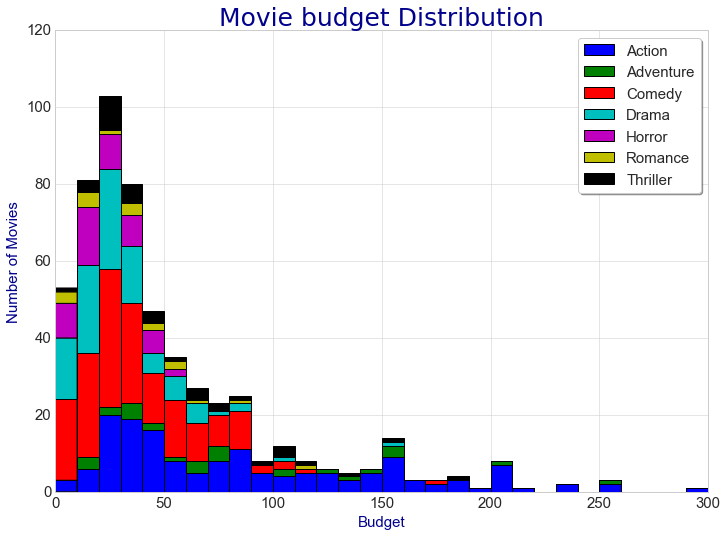

In [179]:
sns.set_style('whitegrid')


list1 = list()
mylabels = list()
for gen in movies.Genre.cat.categories:
    list1.append(movies[movies.Genre == gen].BudgetMillion)
    mylabels.append(gen)

fig, ax = plt.subplots()
fig.set_size_inches(11.7,8.27)
h = plt.hist(list1, bins=30, stacked = True, rwidth=1, label = mylabels)
plt.title('Movie budget Distribution',fontsize=25,\
         color='darkblue',fontname='Console')
plt.ylabel('Number of Movies',fontsize=15,color='darkblue')
plt.xlabel('Budget',fontsize=15, color='darkblue')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.legend(frameon = True,shadow= True,framealpha=1,\
           fancybox=True, prop={'size':15})
plt.show()